In [125]:
#Importing the Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [126]:
#Importing the Training Set and the Sample Submission
df_train=pd.read_csv("/content/train_ctrUa4K.csv")
df_test=pd.read_csv("/content/test_lAUu6dG.csv")
df_sample=pd.read_csv('/content/sample_submission_49d68Cx.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [127]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [128]:
df_train.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [129]:
df_test.head()
kkk=df_test['Loan_ID']
print(kk.shape)

(614,)


Encoding Features into Categorial Values

In [130]:
Y_train=df_train.Loan_Status.values
X_train=df_train.drop(['Loan_Status','Loan_ID'],axis=1,inplace=False)
Need_Encoding=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for i in Need_Encoding:
  kk=list(X_train[i].values)
  le.fit(kk)
  kk=le.transform(list(X_train[i].values))
  #X_train[i].values=X_train[i].values._replace(kk)
  X_train[i]=kk
  kk2=le.transform(list(df_test[i].values))
  df_test[i]=kk2
print(df_test.shape)

(367, 12)


In [131]:
kk=X_train['Education'].values
kk2=df_test['Education'].values
for i in range(0,len(kk)):
  if(kk[i]==0):
    kk[i]=1
  else:
    kk[i]=0
for i in range(0,len(kk2)):
  if(kk2[i]==0):
    kk2[i]=1
  else:
    kk2[i]=0

df_test['Education']=kk2
X_train['Education']=kk
X_train.tail(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2
613,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1


Using Imputer(Taking Care of Nan and Missing Values)

In [132]:
Loan_test_ID=df_test.Loan_ID.values
df_test.drop('Loan_ID',axis=1,inplace=True)
sip=SimpleImputer(strategy='mean')
X_train=sip.fit_transform(X_train)
X_test_tt=sip.transform(df_test.values)

In [133]:
print(X_train.shape,Y_train.shape)

(614, 11) (614,)


Splitting Of Data

In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.25,random_state=42)

In [154]:
dt=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=20)
dt.fit(X_train,Y_train)
Y_train_pred=dt.predict(X_train)
Y_test_pred=dt.predict(X_test)
print(accuracy_score(Y_train,Y_train_pred)*100,accuracy_score(Y_test,Y_test_pred)*100)

100.0 75.32467532467533


In [155]:
pp=pd.read_csv('/content/sample_submission_49d68Cx.csv')
pp.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [156]:
Y_test_tt=dt.predict(X_test_tt)
print(Y_test_tt.shape)

(367,)


In [157]:
dd={'Loan_ID':kkk,'Loan_Status':Y_test_tt}

In [158]:
df_submi=pd.DataFrame()
df_submi['Loan_ID']=kkk.values
df_submi['Loan_Status']=Y_test_tt

In [159]:
df_submi.describe()

,Loan_ID,Loan_Status
count,367,367
unique,367,2
top,LP001268,Y
freq,1,300


In [161]:
df_submi.to_csv('rf_submission1(md=20).csv')


In [199]:
acc_xg_train=[]
acc_xg_test=[]

In [200]:
i=3
alpha_range=[]
while(i <= 10):
  alpha_range.append(i)
  xgbb=XGBClassifier(max_depth=i,learning_rate=0.17,n_estimators=100)
  xgbb.fit(X_train,Y_train)
  Y_train_xg_pred=xgbb.predict(X_train)
  Y_test_xg_pred=xgbb.predict(X_test)
  acc_xg_test.append(accuracy_score(Y_test,Y_test_xg_pred))
  acc_xg_train.append(accuracy_score(Y_train,Y_train_xg_pred))
  i+=1

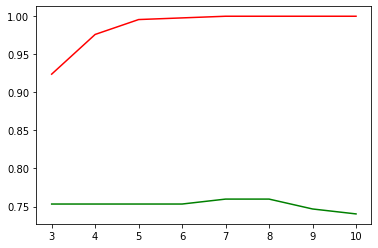

In [198]:
plt.plot(alpha_range,acc_xg_train,'r-')
plt.plot(alpha_range,acc_xg_test,'g-')
plt.show()

In [207]:
xgbb=XGBClassifier(max_depth=6,learning_rate=0.13,n_estimators=100)
xgbb.fit(X_train,Y_train)
Y_train_xg_pred=xgbb.predict(X_train)
Y_test_xg_pred=xgbb.predict(X_test)
print(accuracy_score(Y_test,Y_test_xg_pred),accuracy_score(Y_train,Y_train_xg_pred))

0.7467532467532467 0.9956521739130435


In [208]:
Y_test_xg=xgbb.predict(X_test_tt)
Y_test_xg.shape

(367,)

In [213]:
df_submi_xq=pd.DataFrame()
df_submi_xq['Loan_ID']=kkk.values
df_submi_xq['Loan_Status']=Y_test_xg

In [215]:
df_submi_xq.reset_index(drop=True)
df_submi_xq.head(5)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [216]:
df_submi_xq.to_csv('submission_xqb.csv')